This notebook uses the packages __pandas__(loads datasets and output tables), __scikit-learn__(contains random forest classifiers), __numpy__(label formatting) and __matplotlib__(contains module for plotting graphs). In this project, the only dataset that will be used is the __madelon__ dataset. The folder containing the __madelon__ dataset must be in the same directory as this notebook. 

In order to run the code for this project, the following packages must be imported first

In [1]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd  # load datasets
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt, log

The sizes for the graph and fonts were found in 
https://www.kdnuggets.com/2019/04/data-visualization-python-matplotlib-seaborn.html

In [2]:
# style and size for graph fonts
fontdict_title = {'fontsize': 24, 'weight': 'bold', 'horizontalalignment': 'center'}
fontdict_xlabel = {'fontsize': 18, 'weight': 'bold', 'horizontalalignment': 'center'}
fontdict_ylabel = {'fontsize': 16, 'weight': 'bold', 'horizontalalignment': 'center', 'verticalalignment': 'baseline'}

The following line is used to show the plots inside the notebook

In [3]:
%matplotlib inline

The tree number(k) for all the random forest models are 3,10,30,100,300

In [4]:
tree_num = [3, 10, 30, 100, 300]

The following dictionary stores the training and test misclassification errors for the three problems. 'sqrt500', 'ln500' and 'all500' refer to the random forest models where the split attribute is chosen from a random subset of ∼√500, ln(500) and all the 500 features at each node respectively.

In [5]:
misclassification_errors = {
    "sqrt500": {"train": [], "test": []},
    "ln500": {"train": [], "test": []},
    "all500": {"train": [], "test": []}
}

Load training and test sets from the __madelon__ dataset

In [6]:
madelon_train_data = pd.read_csv("./MADELON/madelon_train.data", header=None, sep=" ").dropna(axis=1).values
madelon_train_labels = np.ravel(
    pd.read_csv("./MADELON/madelon_train.labels", header=None, sep=" ").dropna(axis=1).values)
madelon_test_data = pd.read_csv("./MADELON/madelon_valid.data", header=None, sep=" ").dropna(axis=1).values
madelon_test_labels = np.ravel(
    pd.read_csv("./MADELON/madelon_valid.labels", header=None, sep=" ").dropna(axis=1).values)

Create labels for the three Misclassification Errors tables

In [7]:
rows_labels = tree_num
columns_labels = ["Number of Trees", "Train Misclassification Error", "Test Misclassification Error"]

# Problem 1: Random Forests with Split Attribute Chosen from a Random Subset of ∼√500 Features at each Node

Create random forests with tree numbers(3,10,30,100,300) with split attribute chosen from a random subset of ∼√500 features at each node.

In [8]:
sqrt500_rfs_feature_num = int(sqrt(500))
sqrt500_rfs = [RandomForestClassifier(n_estimators=num, max_features=sqrt500_rfs_feature_num) for num in tree_num]

Train and test random forests generated in previous step and store the misclassification errors for training and test sets of each random forest with its corresponding number of trees.

In [9]:
for rf in sqrt500_rfs:
    rf = rf.fit(madelon_train_data, madelon_train_labels)
    misclassification_errors["sqrt500"]["train"].append([1 - rf.score(madelon_train_data,
                                                                      madelon_train_labels),
                                                         rf.n_estimators])
    misclassification_errors["sqrt500"]["test"].append([1 - rf.score(madelon_test_data,
                                                                     madelon_test_labels),
                                                        rf.n_estimators])

Plot training and test misclassification errors vs number of trees in random forests graph

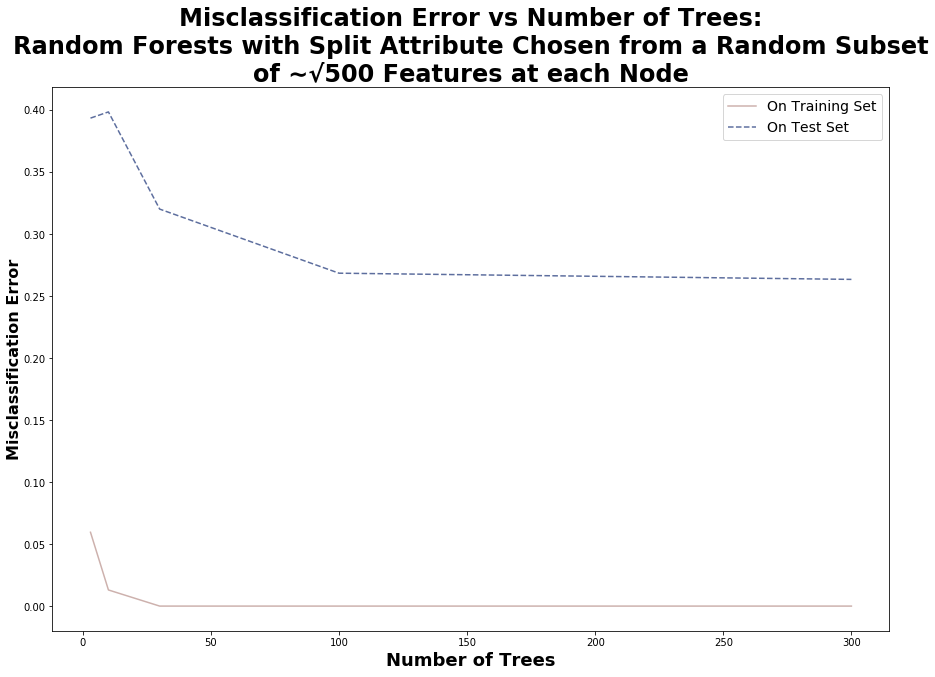

In [10]:
# size of graph
plt.rcParams['figure.figsize'] = [15, 10]  # size=15x10 inches

# labels
plt.title("Misclassification Error vs Number of Trees:\nRandom Forests with Split Attribute Chosen from a Random "
          "Subset\nof ∼√500 Features at each Node", fontdict=fontdict_title) 
plt.xlabel("Number of Trees", fontdict=fontdict_xlabel)
plt.ylabel("Misclassification Error", fontdict=fontdict_ylabel)

# plotting
sqrt500_train_misclassification_errors = [train_error[0] for train_error in
                                          misclassification_errors["sqrt500"]["train"]]
sqrt500_test_misclassification_errors = [test_error[0] for test_error in misclassification_errors["sqrt500"]["test"]]
plt.plot(tree_num, sqrt500_train_misclassification_errors,
         color="#CDB1AD",
         linestyle="-",
         label="On Training Set")
plt.plot(tree_num, sqrt500_test_misclassification_errors,
         color="#5D6E9E",
         linestyle="--",
         label="On Test Set")
plt.legend(fontsize=14);

## Training and Test Misclassification Error Table

Create tables for training and test misclassification errors with the respective number of trees for each random forest

In [11]:
# Find the training and test misclassification errors for each random forest in order of increasing number of trees
sqrt500_train_errors = [error[0] for error in misclassification_errors["sqrt500"]["train"]]
sqrt500_test_errors = [error[0] for error in misclassification_errors["sqrt500"]["test"]]
sqrt500_errors = {
    columns_labels[1]: sqrt500_train_errors,
    columns_labels[2]: sqrt500_test_errors
}

# Create dataframe to output table
sqrt500_tabledf = pd.DataFrame(sqrt500_errors, index=rows_labels)
sqrt500_tabledf.index.name = columns_labels[0]
sqrt500_tabledf

,Train Misclassification Error,Test Misclassification Error
Number of Trees,,
3,0.0595,0.393333
10,0.0130,0.398333
30,0.0000,0.320000
100,0.0000,0.268333
300,0.0000,0.263333


# Problem 2: Random Forests with Split Attribute Chosen from a Random Subset of ln(500) Features at each Node

Create random forests with tree numbers(3,10,30,100,300) with every split attribute chosen from a random subset of ln(500) features at each node.

In [12]:
ln500_rfs_feature_num = int(log(500))
ln500_rfs = [RandomForestClassifier(n_estimators=num, max_features=ln500_rfs_feature_num) for num in tree_num]

Train and test random forests generated in previous step and store the misclassification errors for training and test sets of each random forest with its corresponding number of trees.

In [13]:
for rf in ln500_rfs:
    rf = rf.fit(madelon_train_data, madelon_train_labels)
    misclassification_errors["ln500"]["train"].append([1 - rf.score(madelon_train_data,
                                                                    madelon_train_labels),
                                                       rf.n_estimators])
    misclassification_errors["ln500"]["test"].append([1 - rf.score(madelon_test_data,
                                                                   madelon_test_labels),
                                                      rf.n_estimators])

Plot training and test errors vs number of trees in random forests graph

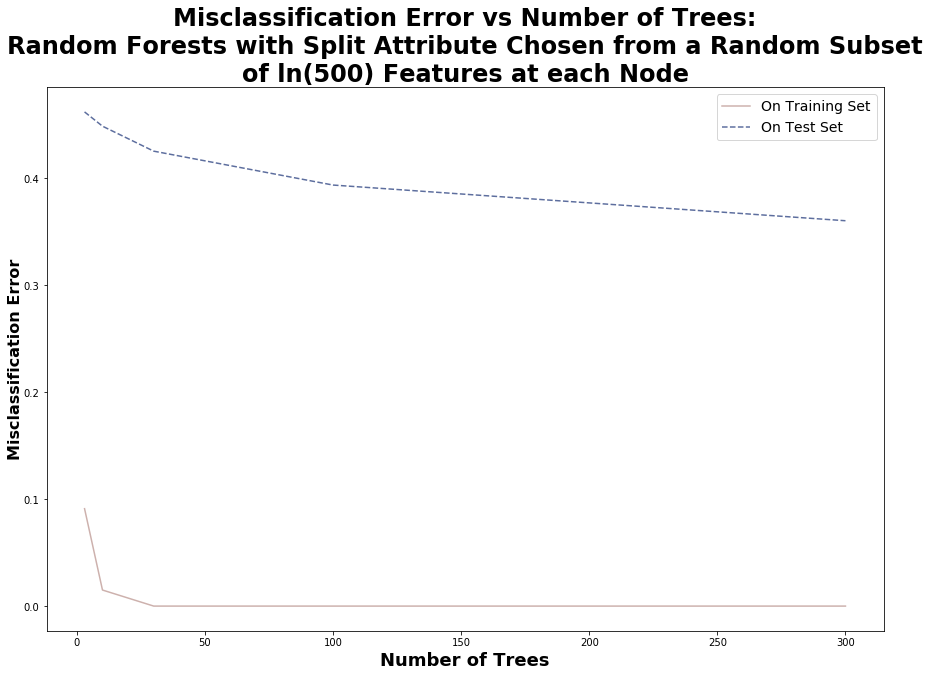

In [14]:
# size of graph
plt.rcParams['figure.figsize'] = [15, 10]  # size=15x10 inches

# labels
plt.title("Misclassification Error vs Number of Trees:\nRandom Forests with Split Attribute Chosen from a Random "
          "Subset\nof ln(500) Features at each Node", fontdict=fontdict_title) 
plt.xlabel("Number of Trees", fontdict=fontdict_xlabel)
plt.ylabel("Misclassification Error", fontdict=fontdict_ylabel)

# plotting
ln500_train_misclassification_errors = [train_error[0] for train_error in
                                        misclassification_errors["ln500"]["train"]]
ln500_test_misclassification_errors = [test_error[0] for test_error in misclassification_errors["ln500"]["test"]]
plt.plot(tree_num, ln500_train_misclassification_errors,
         color="#CDB1AD",
         linestyle="-",
         label="On Training Set")
plt.plot(tree_num, ln500_test_misclassification_errors,
         color="#5D6E9E",
         linestyle="--",
         label="On Test Set")
plt.legend(fontsize=14);

## Training and Test Misclassification Error Table

Create tables for training and test misclassification errors with their respective number of trees for each random forest

In [15]:
# Find the training and test misclassification errors for each random forest in order of increasing number of trees
ln500_train_errors = [error[0] for error in misclassification_errors["ln500"]["train"]]
ln500_test_errors = [error[0] for error in misclassification_errors["ln500"]["test"]]
ln500_errors = {
    columns_labels[1]: ln500_train_errors,
    columns_labels[2]: ln500_test_errors
}

# Create dataframe to output table
ln500_tabledf = pd.DataFrame(ln500_errors, index=rows_labels)
ln500_tabledf.index.name = columns_labels[0]
ln500_tabledf

,Train Misclassification Error,Test Misclassification Error
Number of Trees,,
3,0.091,0.461667
10,0.015,0.448333
30,0.000,0.425000
100,0.000,0.393333
300,0.000,0.360000


# Problem 3: Random Forests with Split Attribute Chosen from all 500 Features at each Node

Create random forests with tree numbers=(3,10,30,100,300) with every split attribute chosen from all 500 features at each node.

In [16]:
all500_rfs_feature_num = 500
all500_rfs = [RandomForestClassifier(n_estimators=num, max_features=all500_rfs_feature_num) for num in tree_num]

Train and test random forests generated in previous step and store the misclassification errors for training and test sets of each random forest with its corresponding number of trees.

In [17]:
for rf in all500_rfs:
    rf = rf.fit(madelon_train_data, madelon_train_labels)
    misclassification_errors["all500"]["train"].append([1 - rf.score(madelon_train_data,
                                                                     madelon_train_labels),
                                                        rf.n_estimators])
    misclassification_errors["all500"]["test"].append([1 - rf.score(madelon_test_data,
                                                                    madelon_test_labels),
                                                       rf.n_estimators])

Plot training and test errors vs number of trees in random forests graph

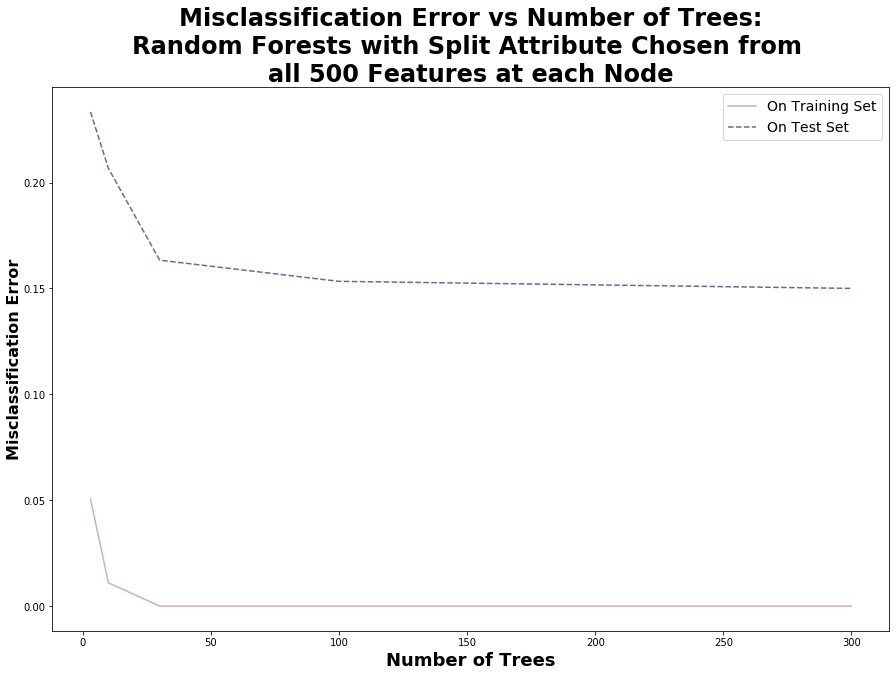

In [18]:
# size of graph
plt.rcParams['figure.figsize'] = [15, 10]  # size=15x10 inches

# labels
plt.title("Misclassification Error vs Number of Trees:\nRandom Forests with Split Attribute Chosen from \n"
          "all 500 Features at each Node", fontdict=fontdict_title) 
plt.xlabel("Number of Trees", fontdict=fontdict_xlabel)
plt.ylabel("Misclassification Error", fontdict=fontdict_ylabel)

# plotting
all500_train_misclassification_errors = [train_error[0] for train_error in
                                         misclassification_errors["all500"]["train"]]
all500_test_misclassification_errors = [test_error[0] for test_error in misclassification_errors["all500"]["test"]]
plt.plot(tree_num, all500_train_misclassification_errors,
         color="#CDB1AD",
         linestyle="-",
         label="On Training Set")
plt.plot(tree_num, all500_test_misclassification_errors,
         color="#5D6E9E",
         linestyle="--",
         label="On Test Set")
plt.legend(fontsize=14);

## Training and Test Misclassification Error Table

Create table for training and test misclassification errors with their respective number of trees for each random forest

In [19]:
all500_train_errors = [error[0] for error in misclassification_errors["all500"]["train"]]
all500_test_errors = [error[0] for error in misclassification_errors["all500"]["test"]]
all500_errors = {
    columns_labels[1]: all500_train_errors,
    columns_labels[2]: all500_test_errors
}

# Create dataframe to output table
all500_tabledf = pd.DataFrame(all500_errors, index=rows_labels)
all500_tabledf.index.name = columns_labels[0]
all500_tabledf

,Train Misclassification Error,Test Misclassification Error
Number of Trees,,
3,0.0505,0.233333
10,0.0110,0.206667
30,0.0000,0.163333
100,0.0000,0.153333
300,0.0000,0.150000
